# Day 2 特徵工程
* 建議可以先「變更執行階段類型」為「TPU」或「GPU」，利於後段機器學習模型訓練

## 套件

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

## 一、資料集
* 請上傳你的資料集並更改為你的檔名

In [2]:
df = pd.read_csv('smiles_descriptor.csv')
df

,Unnamed: 0,ID,name,smiles,output,nAcid,ALogP,ALogp2,AMR,apol,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,1,ABACAVIRSULFATE,Nc1nc(NC2CC2)c3ncn(C4CC(CO)C=C4)c3n1,0,0.0,-1.8653,3.479344,47.8891,44.044274,...,0.862046,0.116831,0.560654,0.379450,0.268039,20.706840,52.049186,91.644726,0.793068,1.208143
1,1,2,ACARBOSE,CC1OC(OC2C(O)C(O)C(OC3C(O)C(O)C(O)OC3CO)OC2CO)...,0,0.0,-7.2263,52.219412,137.7680,88.208099,...,0.867267,0.085380,0.587220,0.443947,0.472578,40.811368,198.465988,477.620358,0.800900,1.503745
2,2,3,ACEBUTOLOL,CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(c1)C(=O)C,0,0.0,-2.1004,4.411680,67.0727,55.758204,...,0.910758,0.057143,0.494202,0.319559,0.386393,29.370226,71.693573,143.387359,0.866137,1.200154
3,3,4,ACECAINIDE,CCN(CC)CCNC(=O)c1ccc(NC(=O)C)cc1,0,0.0,-0.5179,0.268220,52.6108,46.640239,...,0.908190,0.048952,0.533958,0.387559,0.470449,24.128665,49.765298,100.659835,0.862285,1.391967
4,4,5,ACECLOFENAC,OC(=O)COC(=O)Cc1ccccc1Nc2c(Cl)cccc2Cl,0,1.0,0.5703,0.325242,37.1534,45.496309,...,0.637072,0.328403,0.478416,0.401624,0.358254,15.813288,60.651906,105.027532,0.455608,1.238294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,935,936,ZONISAMIDE,c1ccc2c(c1)c(no2)CS(=O)(=O)N,1,0.0,-1.0790,1.164241,17.4729,26.920344,...,0.757968,0.181602,0.562223,0.458080,0.319946,9.152687,16.287467,31.817957,0.636952,1.340249
936,936,937,ZOPICLONE,CN1CCN(CC1)C(=O)OC2c3c(nccn3)C(=O)N2c4ccc(cn4)Cl,1,0.0,0.3196,0.102144,52.4709,52.441481,...,0.608756,0.298939,0.476373,0.361331,0.438777,15.938358,67.512784,151.462539,0.413134,1.276481
937,937,938,ZOTEPINE,CN(C)CCOC1=Cc2ccccc2Sc3c1cc(cc3)Cl,1,0.0,1.4428,2.081672,48.3903,50.664274,...,0.761822,0.179889,0.535430,0.342230,0.420814,16.442415,51.890192,103.842100,0.642733,1.298474
938,938,939,ZOTEPINE,CN(C)CCOC1=Cc2cc(ccc2Sc3c1cccc3)Cl,1,0.0,1.4428,2.081672,48.3903,50.664274,...,0.763356,0.176037,0.533508,0.372269,0.410134,16.487995,52.009092,105.002302,0.645034,1.315910


## 刪除欄位

In [3]:
df = df.drop(columns=['Unnamed: 0', 'ID', 'name', 'smiles'])
df

,output,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,0.0,-1.8653,3.479344,47.8891,44.044274,9.0,10.0,39.0,21.0,...,0.862046,0.116831,0.560654,0.379450,0.268039,20.706840,52.049186,91.644726,0.793068,1.208143
1,0,0.0,-7.2263,52.219412,137.7680,88.208099,0.0,0.0,87.0,44.0,...,0.867267,0.085380,0.587220,0.443947,0.472578,40.811368,198.465988,477.620358,0.800900,1.503745
2,0,0.0,-2.1004,4.411680,67.0727,55.758204,6.0,6.0,52.0,24.0,...,0.910758,0.057143,0.494202,0.319559,0.386393,29.370226,71.693573,143.387359,0.866137,1.200154
3,0,0.0,-0.5179,0.268220,52.6108,46.640239,6.0,6.0,43.0,20.0,...,0.908190,0.048952,0.533958,0.387559,0.470449,24.128665,49.765298,100.659835,0.862285,1.391967
4,0,1.0,0.5703,0.325242,37.1534,45.496309,12.0,12.0,36.0,23.0,...,0.637072,0.328403,0.478416,0.401624,0.358254,15.813288,60.651906,105.027532,0.455608,1.238294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1,0.0,-1.0790,1.164241,17.4729,26.920344,9.0,10.0,22.0,14.0,...,0.757968,0.181602,0.562223,0.458080,0.319946,9.152687,16.287467,31.817957,0.636952,1.340249
936,1,0.0,0.3196,0.102144,52.4709,52.441481,12.0,12.0,44.0,27.0,...,0.608756,0.298939,0.476373,0.361331,0.438777,15.938358,67.512784,151.462539,0.413134,1.276481
937,1,0.0,1.4428,2.081672,48.3903,50.664274,12.0,12.0,40.0,22.0,...,0.761822,0.179889,0.535430,0.342230,0.420814,16.442415,51.890192,103.842100,0.642733,1.298474
938,1,0.0,1.4428,2.081672,48.3903,50.664274,12.0,12.0,40.0,22.0,...,0.763356,0.176037,0.533508,0.372269,0.410134,16.487995,52.009092,105.002302,0.645034,1.315910


## 填補資料/刪除資料
* 請同學直接使用上週填補資料的結果
* 本範例直接刪除空值的資料（浪費！）

In [62]:
df = df.dropna()
df.describe()

,output,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
count,751.000000,751.000000,751.000000,7.510000e+02,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,0.366178,0.230360,-0.539519,2.299822e+00,49.346474,47.325800,8.061252,8.306258,41.129161,21.687084,...,0.705189,0.216567,0.539400,0.439521,0.394642,16.085722,55.226960,118.195488,0.579452,1.373563
std,0.482080,0.580974,1.418245,5.951057e+00,25.441180,16.596114,5.080838,5.335361,15.419662,7.082322,...,0.179694,0.093313,0.365608,0.073777,0.236463,9.396528,47.704896,123.727695,0.247612,0.573797
min,0.000000,0.000000,-9.309100,4.900000e-07,7.219300,8.231172,0.000000,0.000000,9.000000,4.000000,...,-3.013569,-0.210215,0.358231,0.009991,0.077354,-2.422319,-72.221189,-83.777196,0.130583,0.945274
25%,0.000000,0.000000,-1.370450,1.917564e-01,33.359550,35.876516,6.000000,6.000000,31.000000,17.000000,...,0.624560,0.144478,0.484895,0.385797,0.339038,11.472049,29.034550,54.435145,0.445077,1.264526
50%,0.000000,0.000000,-0.499200,8.202925e-01,45.020600,47.124274,6.000000,6.000000,40.000000,22.000000,...,0.723406,0.204817,0.521226,0.440827,0.391216,14.427596,45.378765,92.672946,0.585831,1.342676
75%,1.000000,0.000000,0.317700,2.338766e+00,59.688350,57.335393,12.000000,12.000000,50.000000,26.000000,...,0.797753,0.287841,0.562092,0.490409,0.432629,18.521415,67.571315,143.003891,0.697315,1.420549
max,1.000000,4.000000,5.546300,8.665934e+01,207.953800,133.058717,24.000000,25.000000,127.000000,58.000000,...,1.635949,0.455518,10.124937,0.839105,5.436597,178.093767,551.567752,1634.182056,5.599021,15.571526


#本範例以下步驟變更前請在此重置變數
* df 原始資料
* data 特徵改變後的資料（隨步驟變化）
    * 只有特徵，沒有標註(output)
* selected_features 目前的特徵（特徵選擇後會減少）

In [72]:
data = df
data = data.drop(columns=['output'])
selected_features = data.columns

## 二、特徵縮放
* 建議使用特徵縮放的方法
    * 基於距離的演算法：例如kNN、k-Means clustering、SVM、PCA等
* 以下兩種方法擇一即可

### 2.1 標準化 Standardization (Z-score Normalization)
#### 將特徵轉為常態分佈的z值（M=0, SD=1）
* 適合用於
    * 假設資料為常態分佈的演算法：例如線性回歸
    * 假設資料中心為０的演算法：例如PCA

In [73]:
#標準化 Standardization (Z-score Normalization)
scaler = StandardScaler()
data = scaler.fit_transform(data)

pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9,...,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874
count,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,...,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02,7.510000e+02
mean,5.676773e-17,-1.182661e-17,3.311451e-17,2.696467e-16,5.014483e-16,-1.324580e-16,3.074919e-17,-4.730644e-18,-1.892258e-16,1.466500e-16,...,-5.203708e-16,-2.743774e-16,1.726685e-16,2.223403e-16,-2.507241e-16,-1.892258e-17,3.784515e-17,-4.730644e-17,1.466500e-16,1.159008e-16
std,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,...,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00
min,-3.967702e-01,-6.187523e+00,-3.867135e-01,-1.656969e+00,-2.357219e+00,-1.587656e+00,-1.557869e+00,-2.085038e+00,-2.499021e+00,-2.103749e+00,...,-2.070869e+01,-4.576690e+00,-4.958576e-01,-5.825852e+00,-1.342706e+00,-1.970981e+00,-2.673375e+00,-1.633485e+00,-1.814003e+00,-7.469087e-01
25%,-3.967702e-01,-5.862773e-01,-3.544699e-01,-6.288065e-01,-6.903371e-01,-4.059617e-01,-4.325471e-01,-6.573368e-01,-6.622415e-01,-6.970714e-01,...,-4.490017e-01,-7.730676e-01,-1.491797e-01,-7.286700e-01,-2.353082e-01,-4.913249e-01,-5.494167e-01,-5.156714e-01,-5.430453e-01,-1.901536e-01
50%,-3.967702e-01,2.844758e-02,-2.487819e-01,-1.701476e-01,-1.215104e-02,-4.059617e-01,-4.325471e-01,-7.327746e-02,4.421215e-02,-4.783541e-02,...,1.014431e-01,-1.260053e-01,-4.974015e-02,1.771573e-02,-1.449960e-02,-1.765792e-01,-2.065775e-01,-2.064174e-01,2.578098e-02,-5.386497e-02
75%,-3.967702e-01,6.048249e-01,6.548466e-03,4.067724e-01,6.035307e-01,7.757330e-01,6.927747e-01,5.756774e-01,6.093751e-01,6.014006e-01,...,5.154618e-01,7.643252e-01,6.210950e-02,6.902202e-01,1.607511e-01,2.593847e-01,2.589374e-01,2.006417e-01,4.763175e-01,8.194181e-02
max,6.492812e+00,4.293950e+00,1.418500e+01,6.238430e+00,5.169286e+00,3.139122e+00,3.130972e+00,5.572630e+00,5.130678e+00,5.687082e+00,...,5.183129e+00,2.562445e+00,2.623556e+01,5.419707e+00,2.133660e+01,1.725276e+01,1.041133e+01,1.226077e+01,2.028546e+01,2.476039e+01


### 2.2 最大最小縮放 Min-Max Scaling
#### 將特徵縮放到 [0, 1] 之間
* 適合用於不限制常態分佈的演算法

In [17]:
#最大最小縮放 Min-Max Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9,...,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,0.057590,0.590330,0.026539,0.209865,0.313189,0.335885,0.332250,0.272281,0.327539,0.270029,...,0.799816,0.641071,0.018550,0.518058,0.059204,0.102528,0.204313,0.117565,0.082084,0.029282
std,0.145243,0.095470,0.068672,0.126740,0.132952,0.211702,0.213414,0.130675,0.131154,0.128442,...,0.038648,0.140166,0.037434,0.088983,0.044122,0.052054,0.076476,0.072020,0.045280,0.039231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.534395,0.002213,0.130223,0.221468,0.250000,0.240000,0.186441,0.240741,0.180556,...,0.782474,0.532785,0.012969,0.453262,0.048829,0.076970,0.162324,0.080451,0.057511,0.021827
50%,0.000000,0.593044,0.009466,0.188315,0.311575,0.250000,0.240000,0.262712,0.333333,0.263889,...,0.803734,0.623421,0.016689,0.519633,0.058565,0.093343,0.188525,0.102709,0.083250,0.027170
75%,0.000000,0.648034,0.026988,0.261385,0.393376,0.500000,0.480000,0.347458,0.407407,0.347222,...,0.819724,0.748132,0.020873,0.579435,0.066292,0.116021,0.224102,0.132006,0.103637,0.032495
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 三、特徵選擇

### 3.1 相關係數法

#### 假設：與標註低相關的特徵對模型可能幫助不大
* 本範例請設定適合的相關係數閾值 r_threshold
    * 提醒：重新執行前記得先重置變數才不會出錯
* 本範例使用pandas的相關係數計算，而非sklearn

#### 挑戰：相關係數閾值應該設定多少？

In [67]:
data = pd.DataFrame(data, columns=selected_features)

#相關分析（只看與output相關的部分）
correlations = data.corrwith(df['output'])

#特徵選擇
r_threshold = 0.2  #請選擇適當的閾值
selected_features = correlations[correlations.abs() > r_threshold].index
data = data[selected_features]

print(selected_features)
pd.DataFrame({'Feature':selected_features, 'Coorelation':data.corrwith(df['output'])})

Index(['nAcid', 'nO', 'ATS0s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s',
       'ATS7s', 'ATS8s',
       ...
       'Ke', 'De', 'P1p', 'P2p', 'Kp', 'P1i', 'P2i', 'Ki', 'P2s', 'Ks'],
      dtype='object', length=270)


,Feature,Coorelation
nAcid,nAcid,-0.249213
nO,nO,-0.386769
ATS0s,ATS0s,-0.369546
ATS2s,ATS2s,-0.274340
ATS3s,ATS3s,-0.214307
...,...,...
P1i,P1i,-0.279038
P2i,P2i,0.248167
Ki,Ki,-0.286513
P2s,P2s,0.259161


### 3.2 決策樹法
#### 利用建立決策樹時的Gini不純度指標的總減少量代表特徵重要性
* 決策樹對於資料單位較不敏感，不一定需要特徵縮放

In [20]:
#建立決策樹
tree = DecisionTreeClassifier()
tree.fit(data, df['output'])

importances = pd.DataFrame({'features':selected_features, 'importance':tree.feature_importances_}).sort_values('importance', ascending=False)
importances.head(10)

,features,importance
1082,maxsssN,0.209173
1565,MOMI-Y,0.097238
950,minaasC,0.069561
1370,nRotB,0.044395
1276,MLFER_S,0.038732
210,AATSC0v,0.037601
1333,nT11Ring,0.033333
359,GATS1s,0.021977
1861,Di,0.019722
1520,TDB7r,0.019381


In [21]:
#從決策樹的信息熵來選擇
sfm = SelectFromModel(tree, threshold=.05)
data = sfm.fit_transform(data, df['output'])
data

array([[2.57485854e-01, 0.00000000e+00, 4.16922516e+03],
       [0.00000000e+00, 0.00000000e+00, 2.34721588e+04],
       [3.82701142e-01, 0.00000000e+00, 7.18324239e+03],
       ...,
       [1.87124223e-01, 2.14888920e+00, 4.15386268e+03],
       [1.59377997e+00, 2.21181079e+00, 3.09386710e+03],
       [1.60931881e+00, 2.20918286e+00, 3.83188208e+03]])

## 四、特徵縮減


### 主成分分析 Principal Components Analysis (PCA)

In [68]:
#創建主成份分析
#請指定主成分個數（須小於特徵數量）
com_number = 10
pca = PCA(n_components=com_number)

pca_result = pca.fit_transform(data)
pca_result

array([[ 5.24552469e+02, -1.15332034e+02, -1.89961039e+02, ...,
         2.18970825e-02, -4.28272419e+00,  3.29531807e+01],
       [ 6.74513794e+03,  2.99657539e+03,  5.54595560e+02, ...,
         1.45237242e+02, -2.77867338e+02, -1.02623174e+02],
       [ 6.99087390e+02, -1.53260559e+02, -2.67722070e+02, ...,
        -2.25442878e+01,  3.02102777e+01,  1.75034951e+01],
       ...,
       [ 7.45160019e+02, -2.51962253e+02,  4.01737676e+01, ...,
        -2.70544245e+01,  1.34469025e+01, -5.09133375e+01],
       [-3.22154785e+02, -4.98028923e+02, -1.23278611e+02, ...,
         8.01746162e+01, -1.31561639e+02, -2.53334622e+01],
       [-2.86378133e+02, -5.74335548e+02, -1.85893976e+02, ...,
         9.16795335e+01, -5.41186697e+01, -3.88493517e+01]])

In [69]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained variance ratio:", explained_variance)
print("Cumulative variance ratio:", cumulative_variance)


Explained variance ratio: [0.6267982  0.21422751 0.06476242 0.02483079 0.02229942 0.01674076
 0.00938048 0.00432066 0.0036157  0.00333142]
Cumulative variance ratio: [0.6267982  0.84102571 0.90578813 0.93061892 0.95291834 0.9696591
 0.97903958 0.98336024 0.98697593 0.99030735]


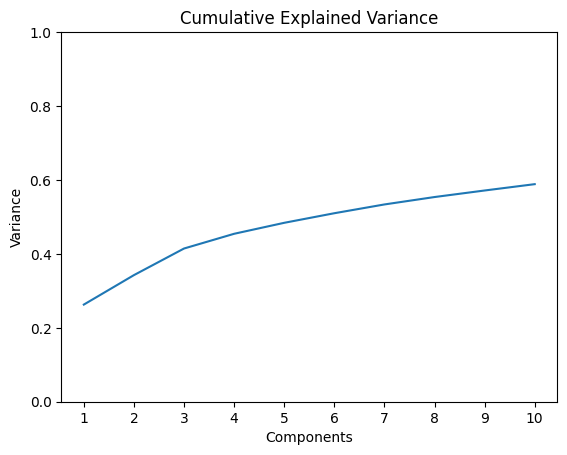

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(com_number), cumulative_variance)

plt.title('Cumulative Explained Variance')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.ylim(0, 1)
plt.xticks(range(com_number), range(1, com_number+1))
plt.show()

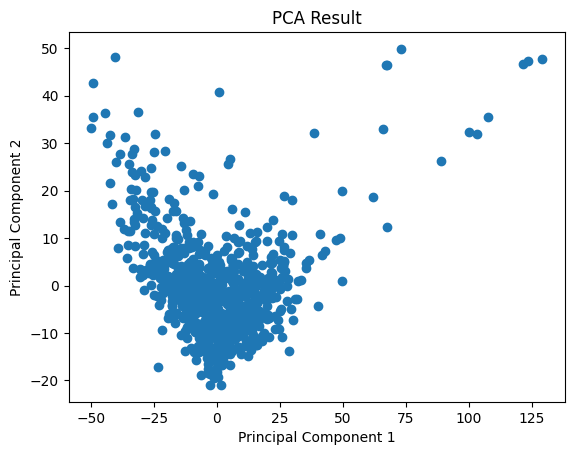

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

# 分類模型

## 支持向量機 Support Vector Machine (SVM)

```
model = svm.SVC(C=1.0, kernel='rbf')
```
* C值：正實數，用於控制分類誤差與決策邊界的平衡
* kernel：linear, rbf, poly等



In [74]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [44]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

### 使用原始資料

In [77]:
#分割訓練集與測試集：使用data（不降維）
x_train, x_test, y_train, y_test = train_test_split(data, df['output'], test_size=0.3, random_state=46)
print('資料量:', x_train.shape, x_test.shape, y_train.size, y_test.size)

#創建Support Vector Classifier
model = svm.SVC(C=1.0, kernel='rbf')

#模型訓練
model.fit(x_train, y_train)

#預測資料
y_pred = model.predict(x_test)

#評估模型
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)
print(f1)

資料量: (525, 1875) (226, 1875) 525 226
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       147
           1       0.85      0.77      0.81        79

    accuracy                           0.87       226
   macro avg       0.87      0.85      0.86       226
weighted avg       0.87      0.87      0.87       226

0.8079470198675496


### 使用主成份分析

In [71]:
#分割訓練集與測試集：使用pca_result
x_train, x_test, y_train, y_test = train_test_split(pca_result, df['output'], test_size=0.3, random_state=46)
print('資料量:', x_train.shape, x_test.shape, y_train.size, y_test.size)

#創建Support Vector Classifier
model = svm.SVC(C=1.0, kernel='rbf')

#模型訓練
model.fit(x_train, y_train)

#預測資料
y_pred = model.predict(x_test)

#評估模型
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

資料量: (525, 10) (226, 10) 525 226
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       147
           1       0.57      0.35      0.44        79

    accuracy                           0.68       226
   macro avg       0.64      0.61      0.61       226
weighted avg       0.66      0.68      0.66       226

